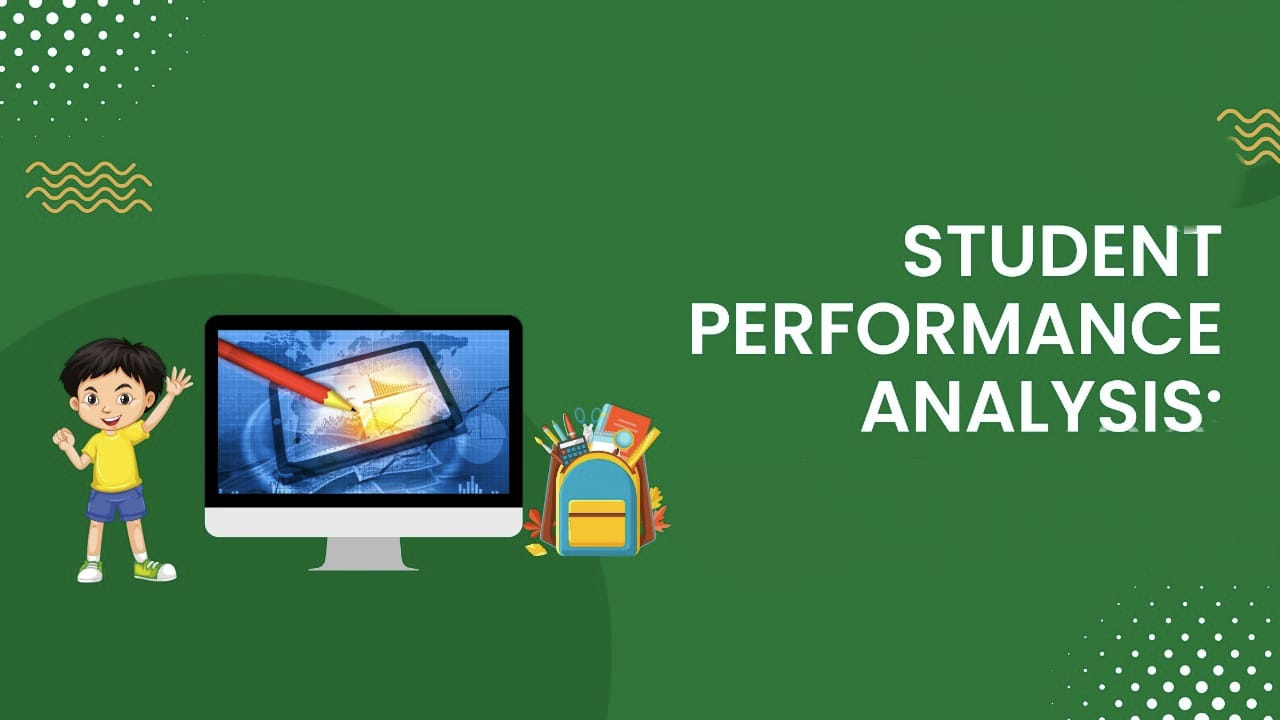

In [1]:
from IPython.display import Image
Image("C:/Users/ASUS/OneDrive/Desktop/student_performance_analysis.jpg")

<p style="color:blue;font-size:times New Roman;font-size:25px">1. Problem Statement</p>
<p>The problem statement is how the student's performance (test score) is affected by other variables such as gender, race/ethnicity, parental level of education, lunch, and test preparation course.</p>


<p style="color:Purple;font-size:times New Roman;font-size:25px">2. Data Collection and Import Required Packages</p> 

In [27]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("StudentsPerformance.csv")
print("Data Shape is :",df.shape)
print("\nShow Top 10 Records")
df.head(10)

Data Shape is : (1000, 8)

Show Top 10 Records


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>3. Dataset Checking to Perform</strong>
</p>
<ul style="color:Purple; font-family: 'Times New Roman'; font-size: 20px;">
  <li>Check Missing Value</li>
  <li>Check Duplicate</li>
  <li>Check Datatype</li>
  <li>Check the number of unique values of each column</li>
  <li>Check statistics of dataset</li>
  <li>Check various categories present in the different categorical columns</li>
</ul>


<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>3.1 Checking Missing Values</strong>
</p>


In [29]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Result:** There are no missing values in the data set.

<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>3.2 Checking Duplicates</strong>
</p>


In [30]:
df.duplicated().sum()

0

**Result:** There are no duplicates values in the data set

<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>3.3 Checking Data Types</strong>
</p>

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


<p style="color:purple;font-size:25px;">3.4 Checking the number of unique values of each column</p>

In [32]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<p style="color:purple;font-size:25px;">3.5 Print numerical and categorical columns</p>

In [33]:
# Define numerical & categorical columns
numeric_columns = [column for column in df.columns if df[column].dtype != 'O']
categorical_columns = [column for column in df.columns if df[column].dtype == 'O']

# print columns
print('We have {} numerical columns(features) : {}'.format(len(numeric_columns), numeric_columns))
print('\nWe have {} categorical columns(features) : {}'.format(len(categorical_columns), categorical_columns))

We have 3 numerical columns(features) : ['math score', 'reading score', 'writing score']

We have 5 categorical columns(features) : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


<p style="color:purple;font-size:25px;">3.6 Print the number of unique values of each categorical column</p>

In [34]:
# print("Categories in 'gender' variable:     ",end=" " )
# print(df['gender'].unique())
for feature in df.columns :
    if df[feature].dtype == 'O':
        print('Categories in {} variable : {}'.format(feature,df[feature].unique()))

Categories in gender variable : ['female' 'male']
Categories in race/ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test preparation course variable : ['none' 'completed']


<p style="color:purple;font-size:25px;">3.7 Checking statistics of data set</p>

In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**
* From above description all means are very close to each other: Between 66 and 69.16
* All standard deviations are also close to each other: Between 14.60 and 15.19
* Minimum score for math is 0, Minimum score for reading is 17, Minimum score for writing is 10

<p style="color:purple;font-size:25px;">3.8 Adding 'Total' and 'Average' Columns</p>

In [36]:
df['total score']= df['math score'] + df['reading score'] + df['writing score']
df['avg score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<p style="color:purple;font-size:25px;">3.9 Counting the total number of students who obtained full marks and those who scored less than 25 marks in Mathematics, Reading, and Writing.</p>

In [37]:
math_full_score = df[df['math score']==100]['math score'].count()
reading_full_score = df[df['reading score']==100]['reading score'].count()
writing_full_score =  df[df['writing score']==100]['writing score'].count()

print(f'Number of students with full marks in Maths: {math_full_score }')
print(f'Number of students with full marks in Reading: {reading_full_score}')
print(f'Number of students with full marks in Writing: {writing_full_score}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [38]:
math_less_25 = df[df['math score'] <= 25]['math score'].count()
reading_less_25 = df[df['reading score'] <= 25]['reading score'].count()
writing_less_25 = df[df['writing score'] <= 25]['writing score'].count()


print(f'Number of students with less than 25 marks in Maths: {math_less_25}')
print(f'Number of students with less than 25 marks in Reading: {reading_less_25}')
print(f'Number of students with less than 25 marks in Writing: {writing_less_25}')

Number of students with less than 25 marks in Maths: 7
Number of students with less than 25 marks in Reading: 4
Number of students with less than 25 marks in Writing: 5


**Insight**
* From above values we get students have performed the worst in Maths
* Best performance is in reading section

<p style="color:purple;font-size:25px;">4. Visualizing the Data</p>

<p style="color:purple;font-size:25px;">4.1 Gender wise Average Score, Math Score, Reading Score, Writing Score distribution</p>

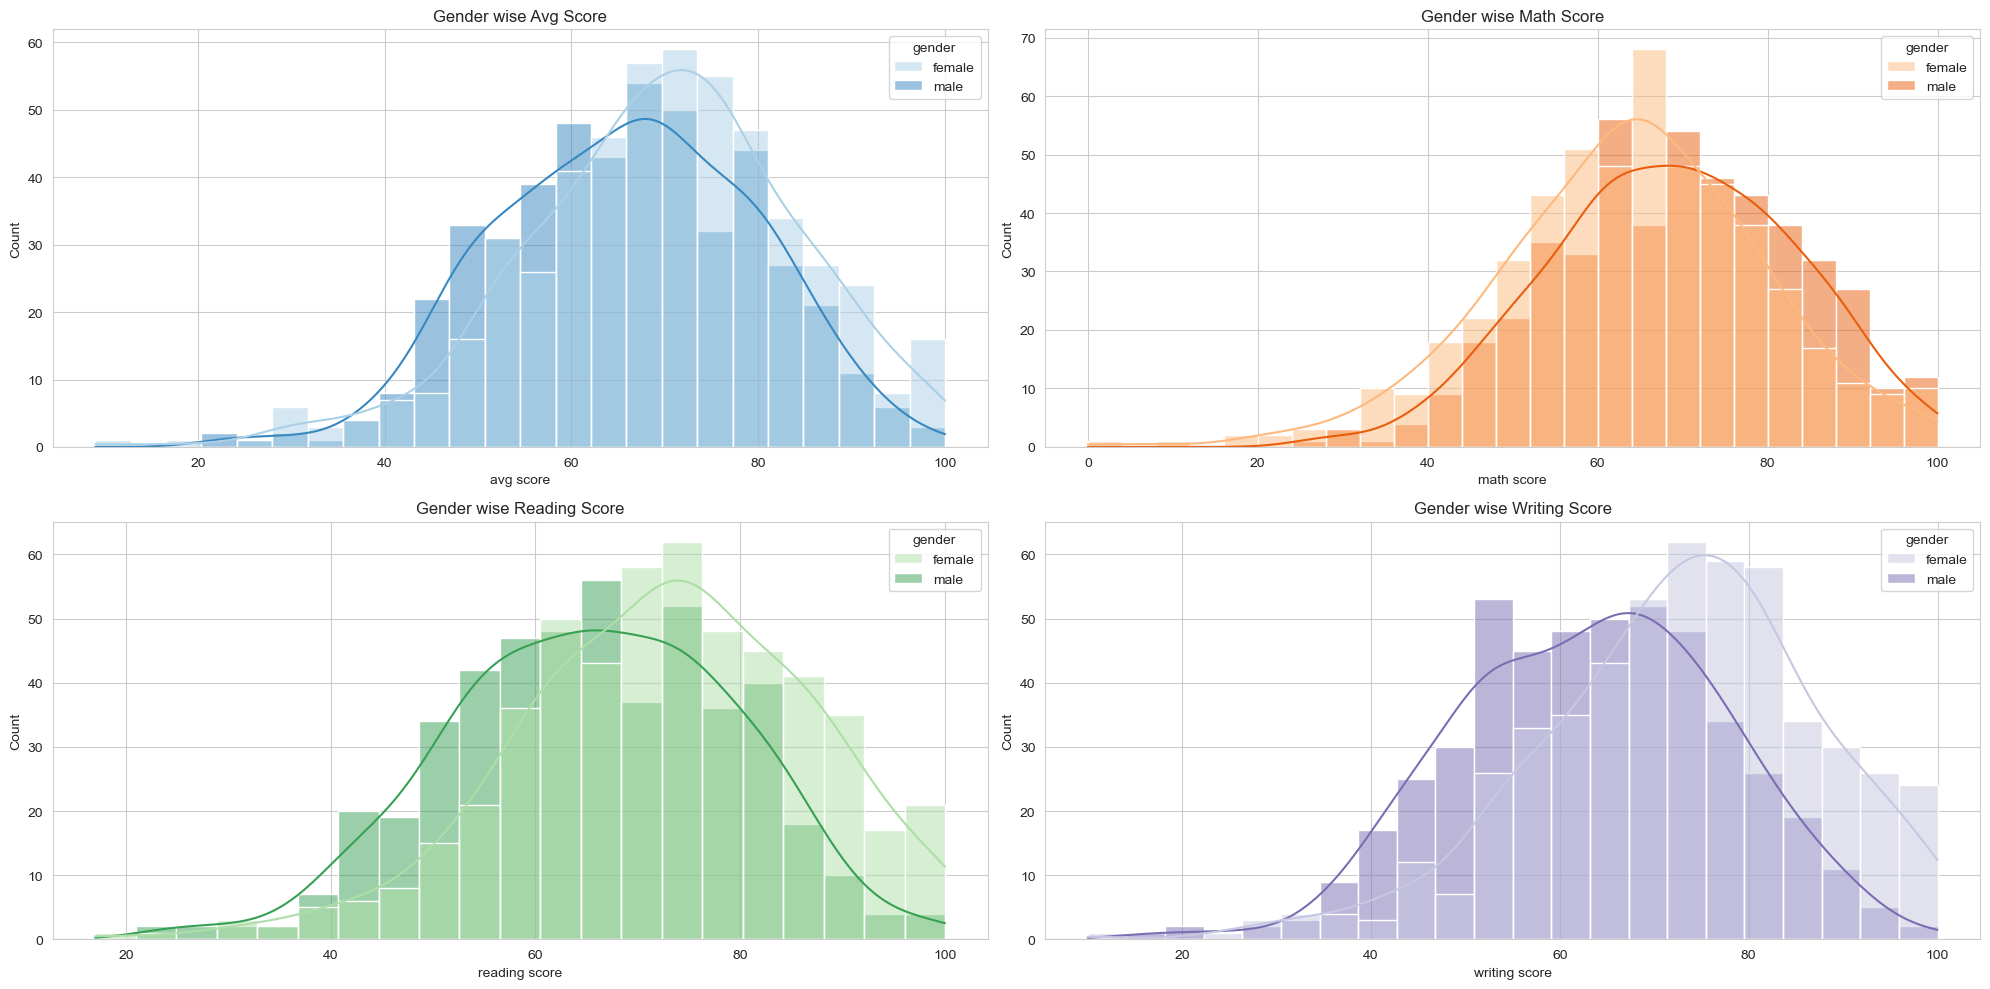

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Define the scores, titles, and color palettes
scores = ['avg score', 'math score', 'reading score', 'writing score']
titles = [
    'Gender wise Avg Score',
    'Gender wise Math Score',
    'Gender wise Reading Score',
    'Gender wise Writing Score'
]
palettes = ['Blues', 'Oranges', 'Greens', 'Purples']  # Custom color palettes for each plot

# Loop through scores, titles, and palettes to create subplots
for i, (score, title, palette) in enumerate(zip(scores, titles, palettes)):
    row, col = divmod(i, 2)  # Calculate the row and column index
    sns.histplot(data=df, x=score, kde=True, hue='gender', ax=axs[row, col], palette=palette)
    axs[row, col].set_title(title)

plt.tight_layout()
plt.show()



**Insights**
* Female students tend to perform well then male students

<p style="color:purple;font-size:25px;">4.2 Lunch Group wise Score Distribution</p>

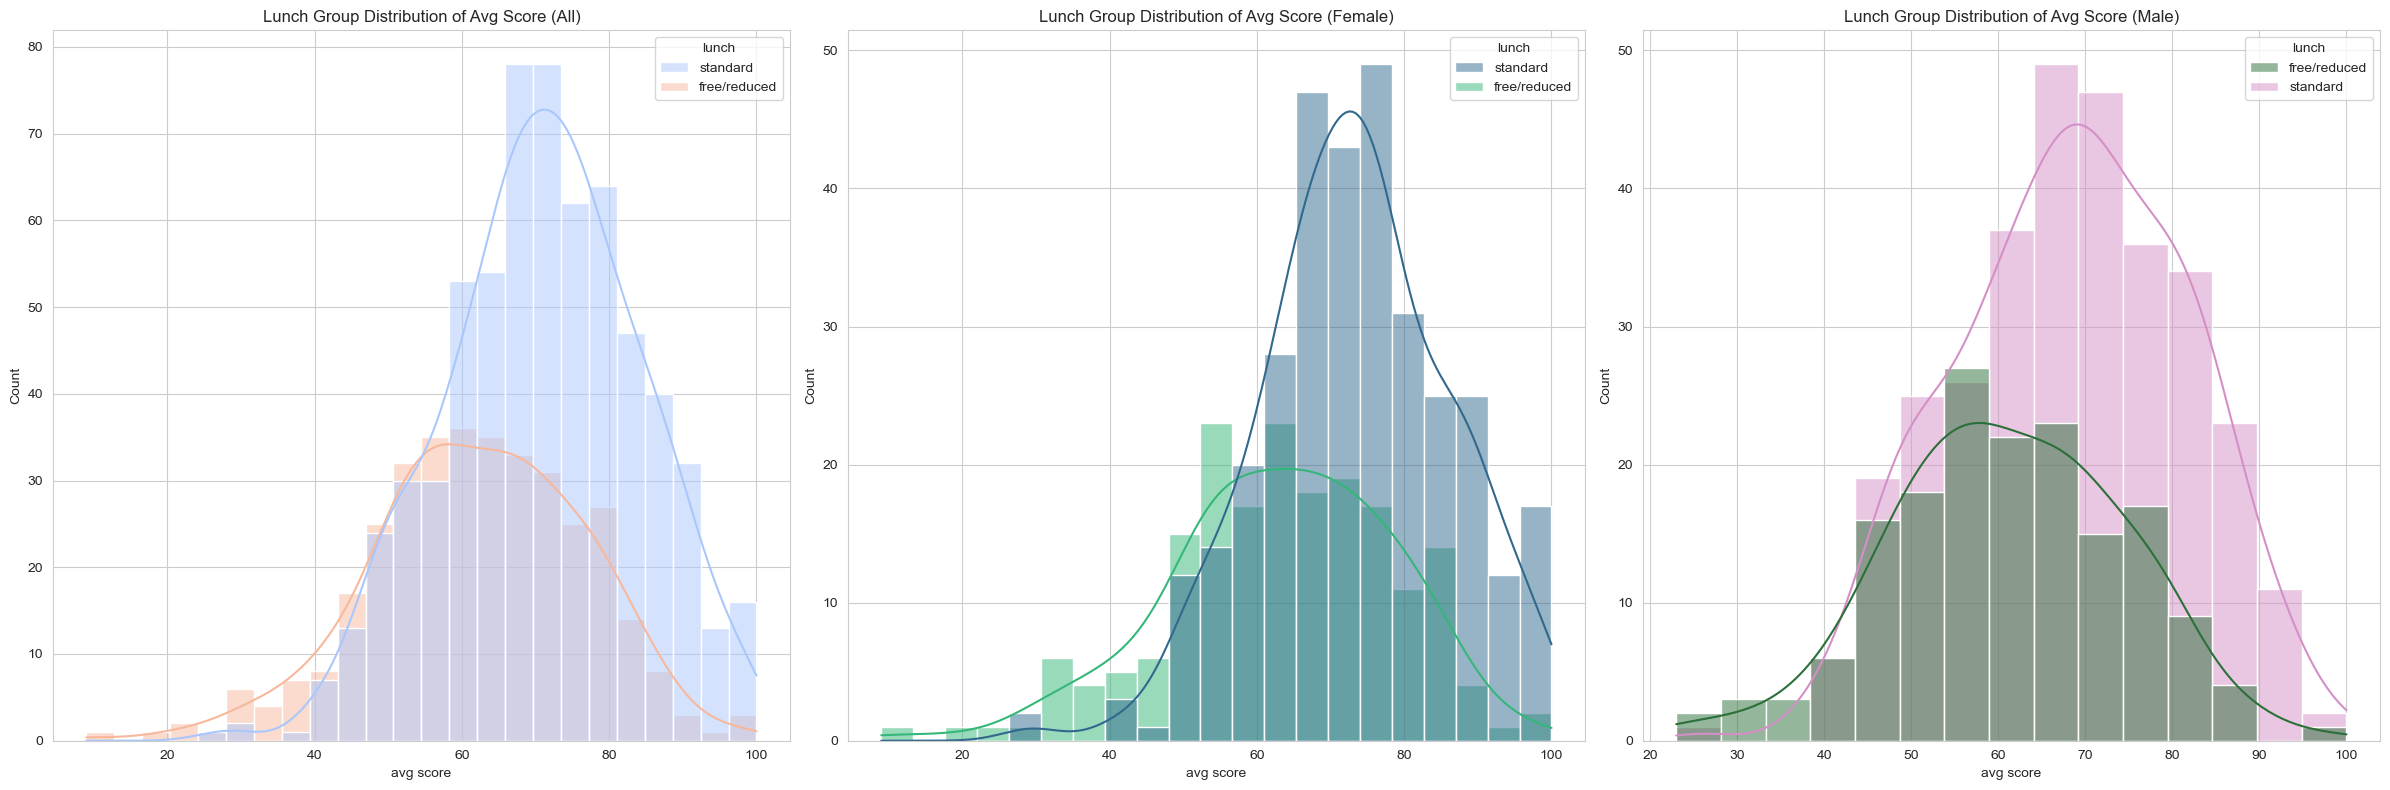

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Define the data subsets, titles, and color palettes
subsets = [df, df[df.gender == 'female'], df[df.gender == 'male']]
titles = [
    'Lunch Group Distribution of Avg Score (All)',
    'Lunch Group Distribution of Avg Score (Female)',
    'Lunch Group Distribution of Avg Score (Male)'
]
palettes = ['coolwarm', 'viridis', 'cubehelix']  # Custom palettes for each plot

# Loop through subsets, titles, and palettes to create subplots
for i, (subset, title, palette) in enumerate(zip(subsets, titles, palettes)):
    axs[i].set_title(title)
    sns.histplot(data=subset, x='avg score', kde=True, hue='lunch', ax=axs[i], palette=palette)

plt.tight_layout()
plt.show()


**Insights**
* Standard lunch helps perform well in exams.
* Standard lunch helps perform well in exams be it a male or a female.

<p style="color:purple;font-size:25px;">4.3 parental level of education wise Score Distribution</p>

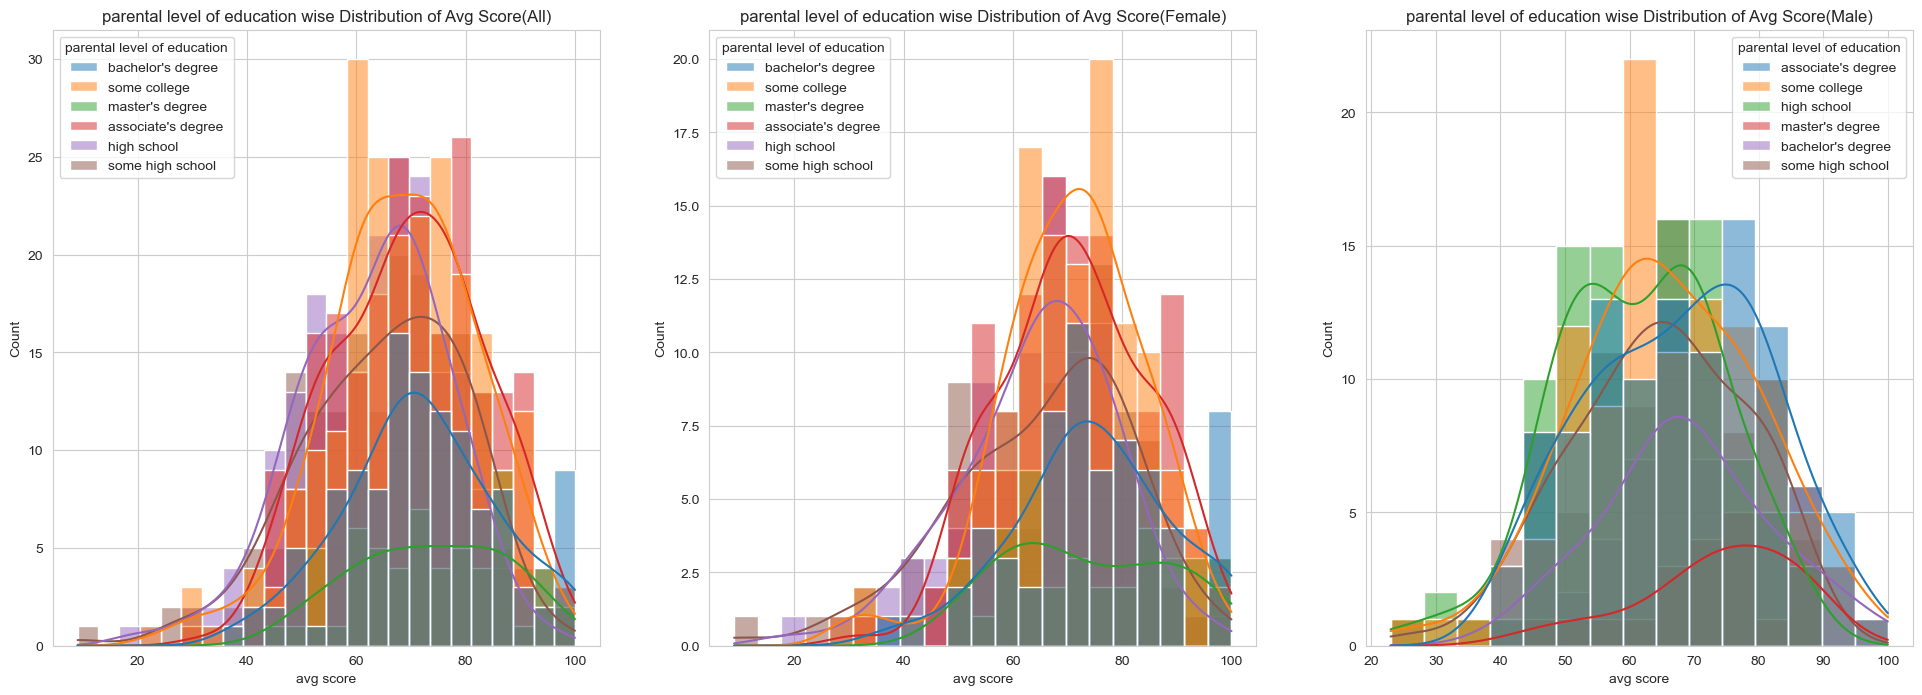

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('parental level of education wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='parental level of education', ax=axs[0])

axs[1].set_title('parental level of education wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='parental level of education', ax=axs[1])

axs[2].set_title('parental level of education wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='parental level of education', ax=axs[2])

plt.show()

**Insights**
* In general parent's education don't help student perform well in exam.
* 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
* 3rd plot we can see there is no effect of parent's education on female students.

<p style="color:purple;font-size:25px;">4.4 race/ethnicity wise Score Distribution</p>

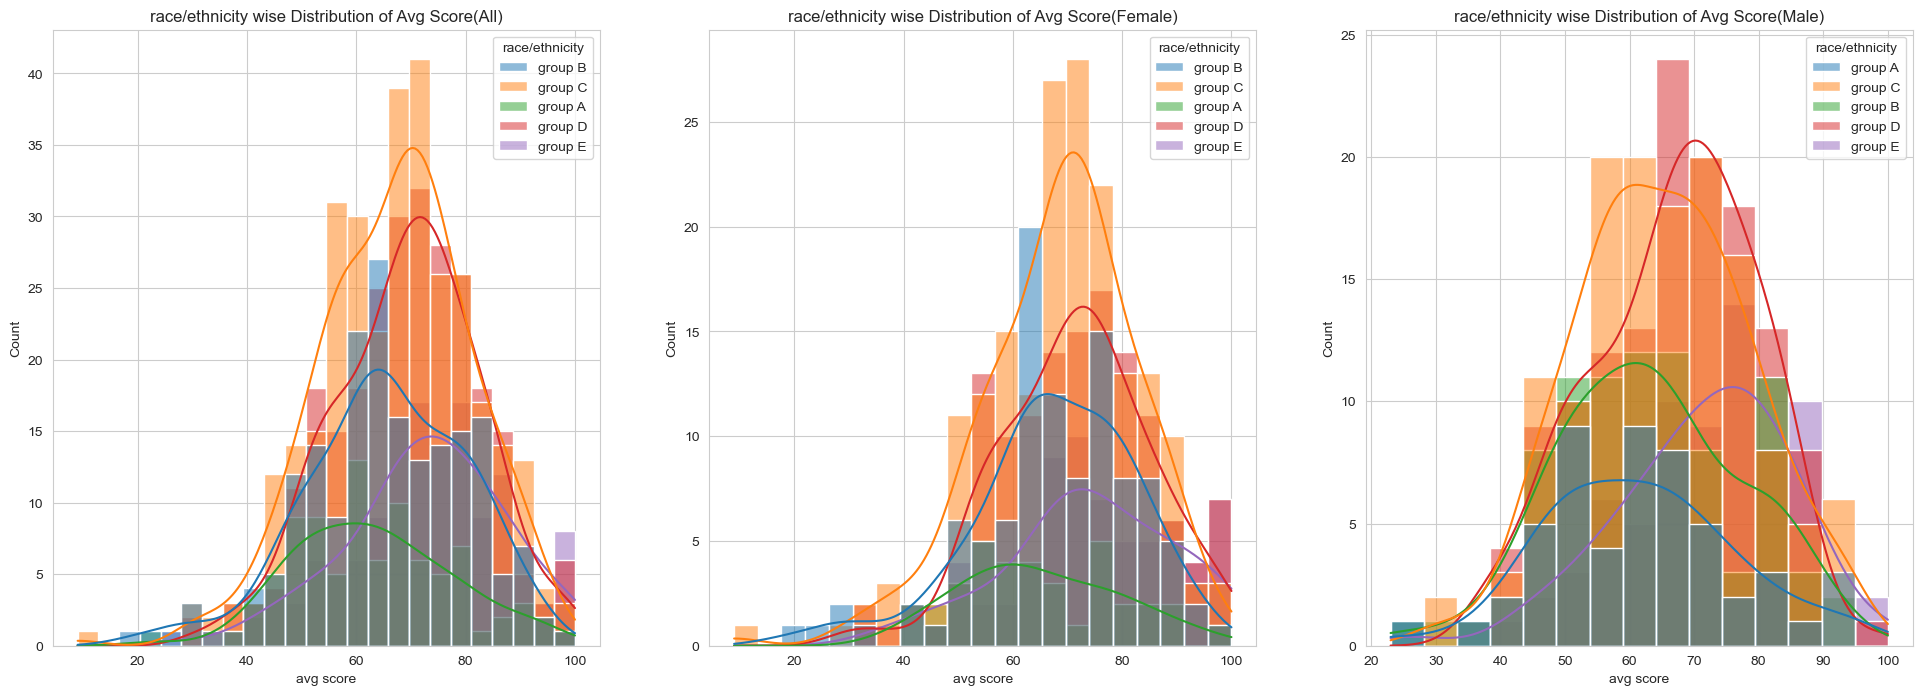

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(24,8))

axs[0].set_title('race/ethnicity wise Distribution of Avg Score(All)')
sns.histplot(data=df, x='avg score', kde=True, hue='race/ethnicity', ax=axs[0])

axs[1].set_title('race/ethnicity wise Distribution of Avg Score(Female)')
sns.histplot(data=df[df.gender=='female'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[1])

axs[2].set_title('race/ethnicity wise Distribution of Avg Score(Male)')
sns.histplot(data=df[df.gender=='male'], x='avg score', kde=True, hue='race/ethnicity', ax=axs[2])

plt.show()

**Insights**
* Students of group A and group B tends to perform poorly in exam.
* Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<p style="color:purple;font-size:25px;">4.5 score of students in all three subjects</p>

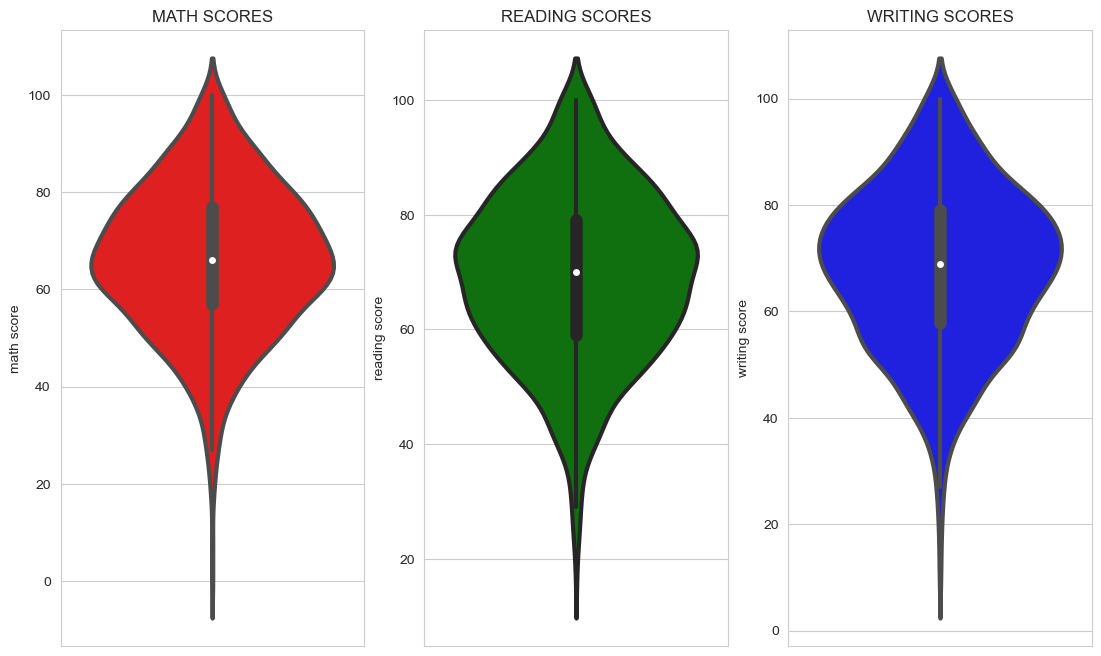

In [43]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
* From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

<p style="color:purple;font-size:25px;">4.6 Multivariate analysis using pieplot</p>

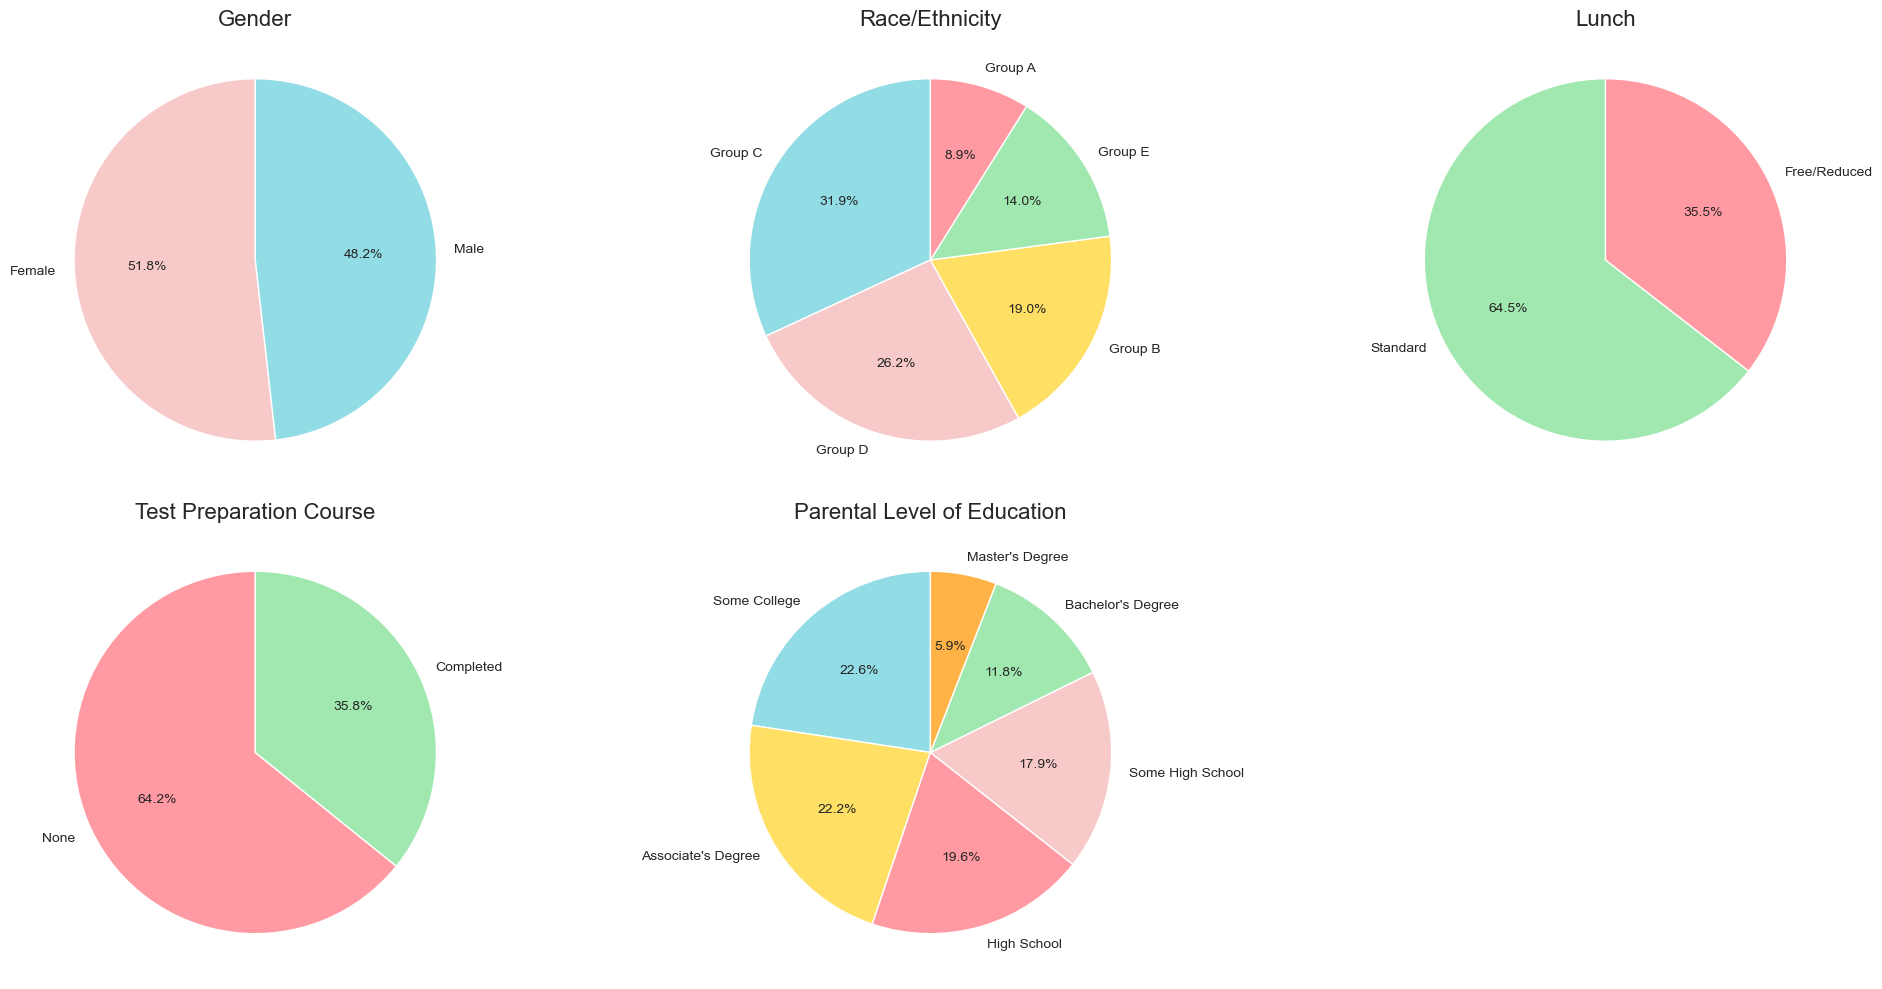

In [44]:
plt.figure(figsize=(20, 10))

# Gender
plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['#F7CAC9', '#92DCE5']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Gender',fontsize=16)

# Race/Ethnicity
plt.subplot(2, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['#92DCE5', '#F7CAC9', '#FFDF64', '#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Race/Ethnicity',fontsize=16)

# Lunch
plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free/Reduced']
colors = ['#A0E8AF', '#FF9AA2']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Lunch',fontsize=16)

# Test Preparation Course
plt.subplot(2, 3, 4)
size = df['test preparation course'].value_counts()
labels = ['None', 'Completed']
colors = ['#FF9AA2', '#A0E8AF']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Test Preparation Course',fontsize=16)

# Parental Level of Education
plt.subplot(2, 3, 5)
size = df['parental level of education'].value_counts()
labels = ["Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"]
colors = ['#92DCE5', '#FFDF64', '#FF9AA2', '#F7CAC9', '#A0E8AF', '#FFB347']

plt.pie(size, colors=colors, labels=labels, autopct='%.1f%%', startangle=90)
plt.title('Parental Level of Education',fontsize=16)

plt.tight_layout()
plt.show()


**Insights**
* Gender wise Number of Male and Female students is almost equal
* Race/Ethnicity wise Number students are greatest in Group C
* Lunch wise Number of students who have standard lunch are greater
* Test Preparation Course wise Number of students who have not enrolled in any test preparation course is greater
* Parental Level of Education wise Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

<p style="color:purple;font-size:25px;">4.7 Feature wise Visualization</p>

### 4.7.1 Gender Column
* How is distribution of Gender ?
* Is gender has any impact on student's performance?

#### How is distribution of Gender? **(Univariate Analysis)**

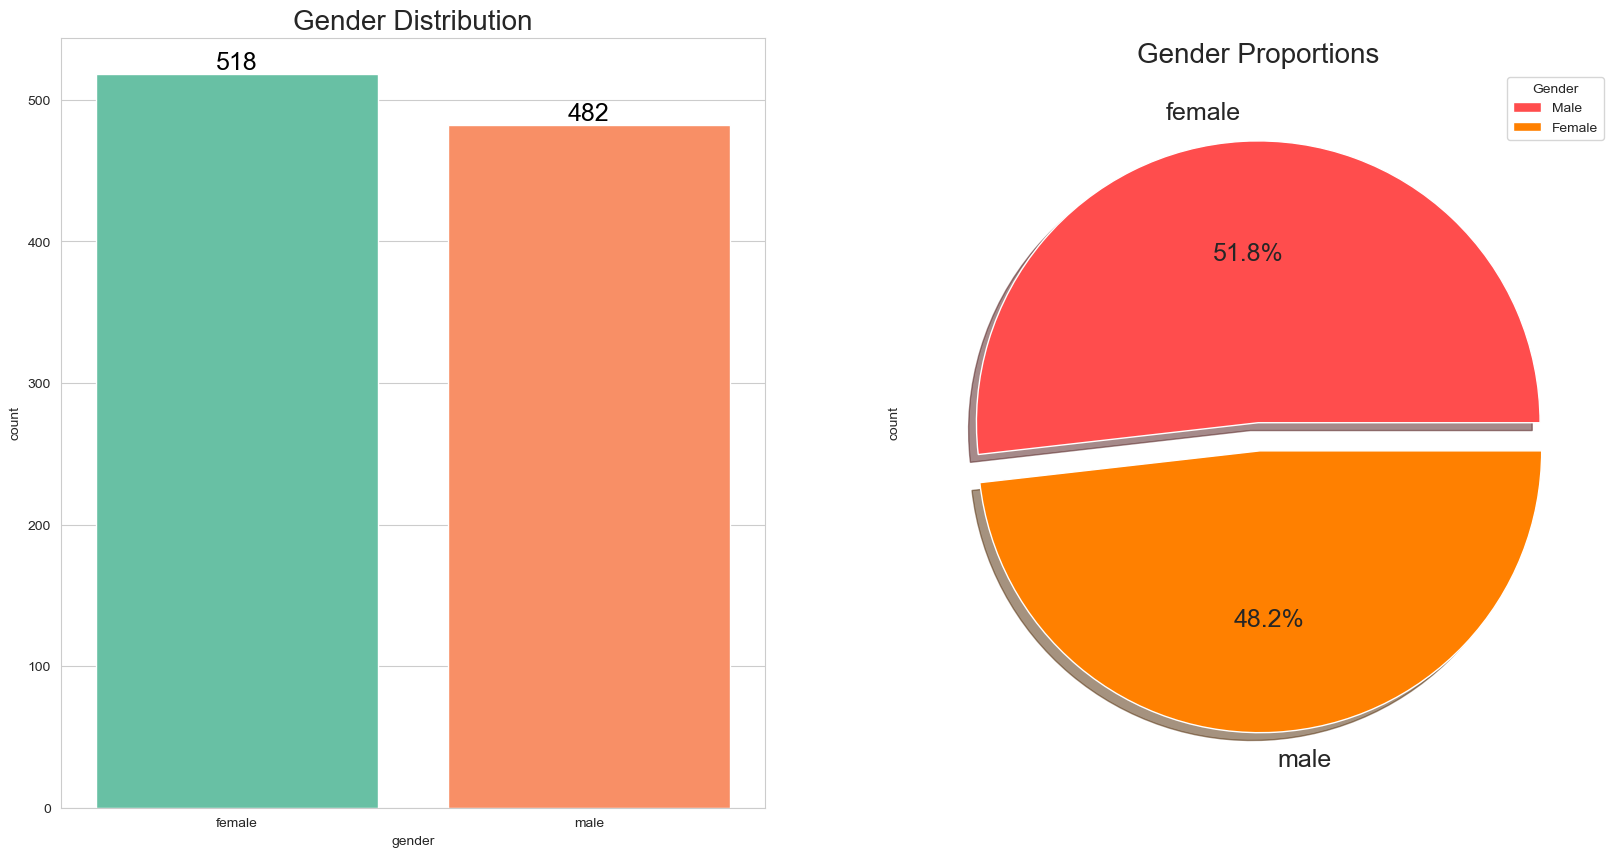

In [45]:
# set the color palette
colors = sns.color_palette('Set2')

# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the count plot
sns.countplot(x=df['gender'], data=df, palette=colors, ax=ax[0], saturation=0.95)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=18)

# plot the pie chart
pie_colors = ['#ff4d4d', '#ff8000']
df['gender'].value_counts().plot(kind='pie', colors=pie_colors, explode=[0, 0.1],
                                 autopct='%1.1f%%', shadow=True, ax=ax[1], textprops={'fontsize': 18})
# set title and legend
ax[0].set_title('Gender Distribution', fontsize=20)
ax[1].set_title('Gender Proportions', fontsize=20)
ax[1].legend(title='Gender', loc='best', labels=['Male', 'Female'])

# show the plot
plt.show()


**Insights**
* Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### Is gender has any impact on student's performance? **(Bivariate Analysis)**

In [49]:
import pandas as pd

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Include the 'gender' column back to perform groupby
numeric_df['gender'] = df['gender']

# Group by 'gender' and calculate the mean for each group
gender_group = numeric_df.groupby('gender').mean()

# Display the grouped data
print(gender_group)



        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


        math score  reading score  writing score  avg score
gender                                                     
female   63.633205      72.608108      72.467181  69.569498
male     68.728216      65.473029      63.311203  65.837483


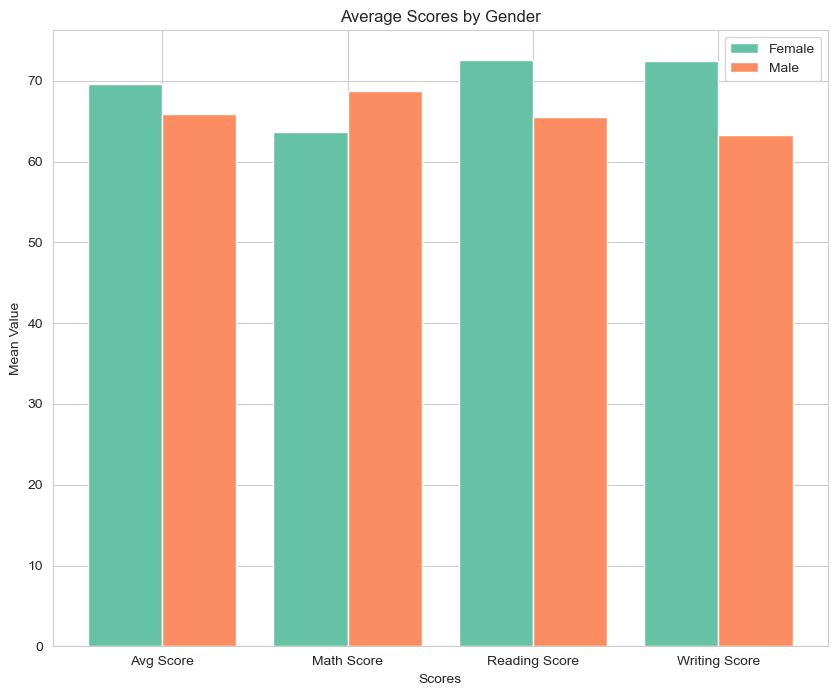

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Calculate average score if it is needed
if 'math score' in df.columns and 'reading score' in df.columns and 'writing score' in df.columns:
    df['avg score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Ensure only numeric columns are used for the mean calculation
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Add 'gender' for grouping
numeric_cols.append('gender')

# Create a new DataFrame with numeric columns and 'gender'
numeric_df = df[numeric_cols]

# Group by 'gender' and calculate the mean for each group
gender_group = numeric_df.groupby('gender').mean()

# Display the grouped data
print(gender_group)

# Plotting the data
plt.figure(figsize=(10, 8))
X = ['Avg Score', 'Math Score', 'Reading Score', 'Writing Score']
female_scores = [gender_group.loc['female', 'avg score'], gender_group.loc['female', 'math score'], gender_group.loc['female', 'reading score'], gender_group.loc['female', 'writing score']]
male_scores = [gender_group.loc['male', 'avg score'], gender_group.loc['male', 'math score'], gender_group.loc['male', 'reading score'], gender_group.loc['male', 'writing score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, female_scores, 0.4, label='Female')
plt.bar(X_axis + 0.2, male_scores, 0.4, label='Male')

plt.xticks(X_axis, X)
plt.xlabel("Scores")
plt.ylabel("Mean Value")
plt.title("Average Scores by Gender")
plt.legend()
plt.show()


**Insights**
* On an average females have a better overall score than men.
* whereas males have scored higher in Maths.

### 4.7.2 Race/Ethnicity Column
* How is Group wise distribution ?
* Is race/ethnicity has any impact on student's performance?

#### How is Group wise distribution? **(Univariate Analysis)**

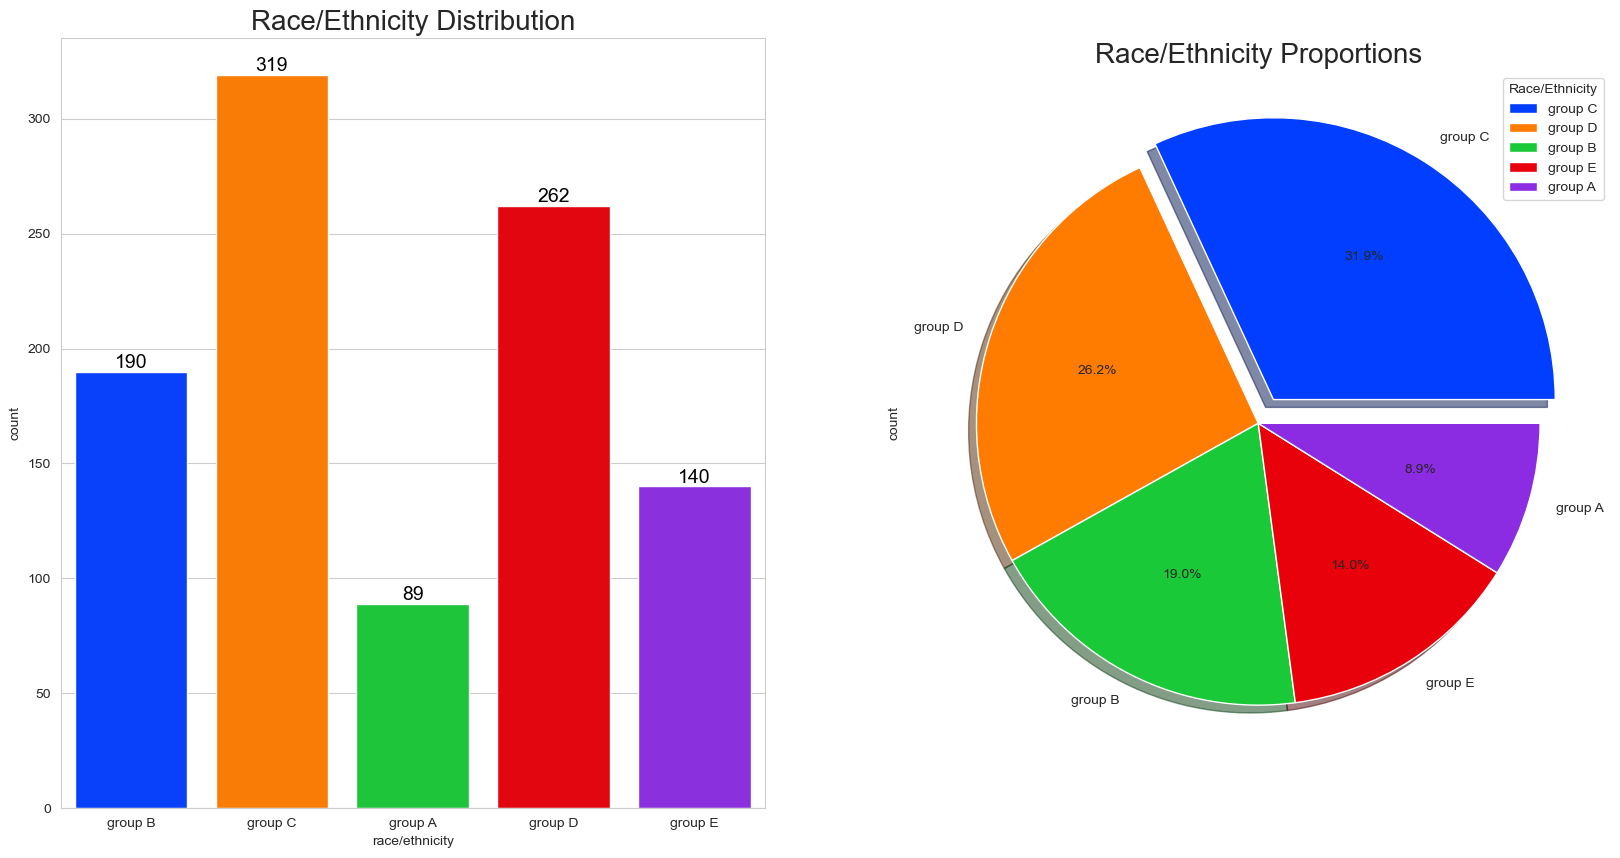

In [53]:
# set the color palette
colors = sns.color_palette('bright')

# create the subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# plot the count plot
sns.countplot(x=df['race/ethnicity'], data=df, palette=colors, ax=ax[0], saturation=0.95)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# plot the pie chart
explode = [0.1, 0, 0, 0, 0]
df['race/ethnicity'].value_counts().plot(kind='pie', colors=colors, explode=explode,
                                         autopct='%1.1f%%', shadow=True, ax=ax[1])
# set title and legend
ax[0].set_title('Race/Ethnicity Distribution', fontsize=20)
ax[1].set_title('Race/Ethnicity Proportions', fontsize=20)
ax[1].legend(title='Race/Ethnicity', loc='best', labels=df['race/ethnicity'].value_counts().index)

# show the plot
plt.show()

**Insights**
* Most of the student belonging from group C /group D.
* Lowest number of students belong to groupA.

#### Is race/ethnicity has any impact on student's performance? **(Bivariate Analysis)**

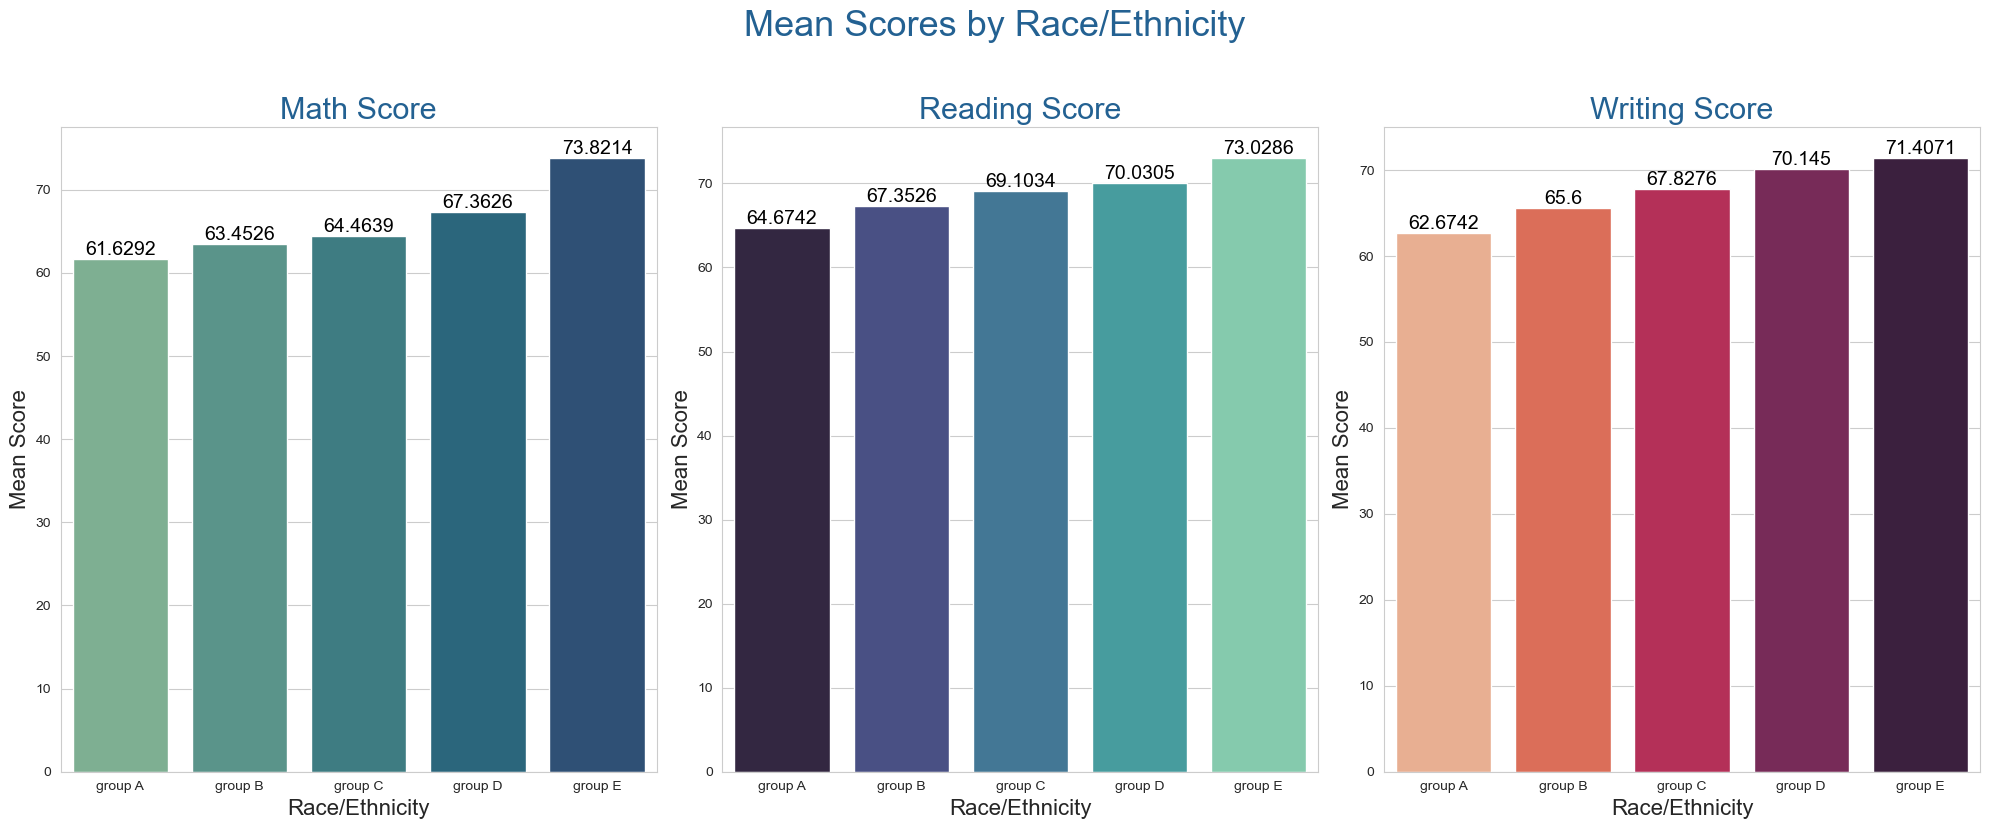

In [54]:
Group_data2 = df.groupby('race/ethnicity')

# create the subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# plot the math scores
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette='crest', ax=ax[0])
ax[0].set_title('Math Score', color='#236192', size=22)
ax[0].set_xlabel('Race/Ethnicity', fontsize=16)
ax[0].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', fontsize=14)

# plot the reading scores
sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette='mako', ax=ax[1])
ax[1].set_title('Reading Score', color='#236192', size=22)
ax[1].set_xlabel('Race/Ethnicity', fontsize=16)
ax[1].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', fontsize=14)

# plot the writing scores
sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette='rocket_r', ax=ax[2])
ax[2].set_title('Writing Score', color='#236192', size=22)
ax[2].set_xlabel('Race/Ethnicity', fontsize=16)
ax[2].set_ylabel('Mean Score', fontsize=16)

# add labels to the bars
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', fontsize=14)

plt.suptitle('Mean Scores by Race/Ethnicity', fontsize=26, color='#236192', y=1.03)
plt.tight_layout()
plt.show()


**Insights**
* Group E students have scored the highest marks.
* Group A students have scored the lowest marks.

### 4.7.3 Parental Level Of Education Column
* What is the best educational background of the student's parents?
* Is parental education has any impact on student's performance?

#### What is the best educational background of the student's parents? **(Univariate Analysis)**

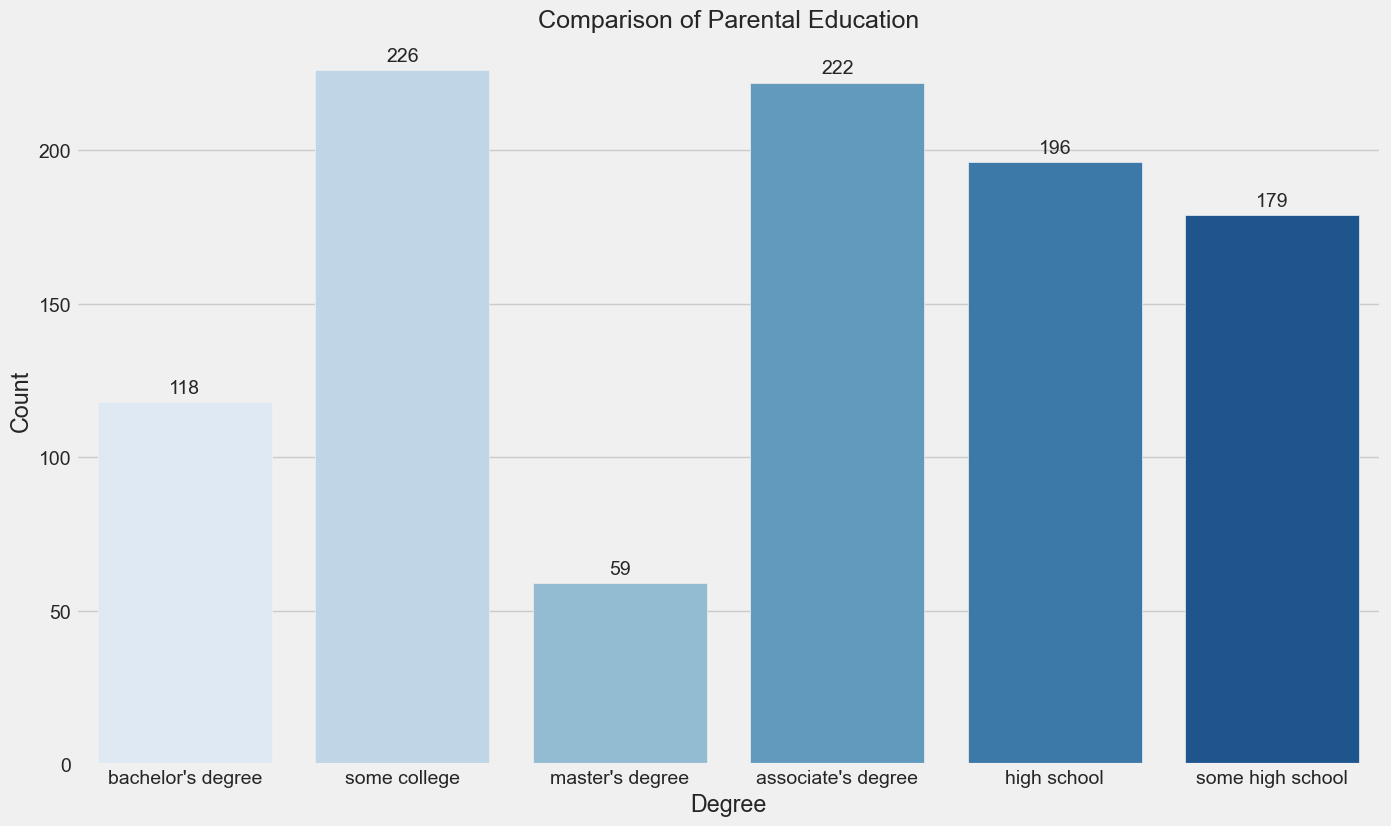

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='parental level of education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontsize=18)
ax.set(xlabel='Degree', ylabel='Count')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()


**Insights**
* Largest number of parents are from some college.

#### Is parental education has any impact on student's performance? **(Bivariate Analysis)**

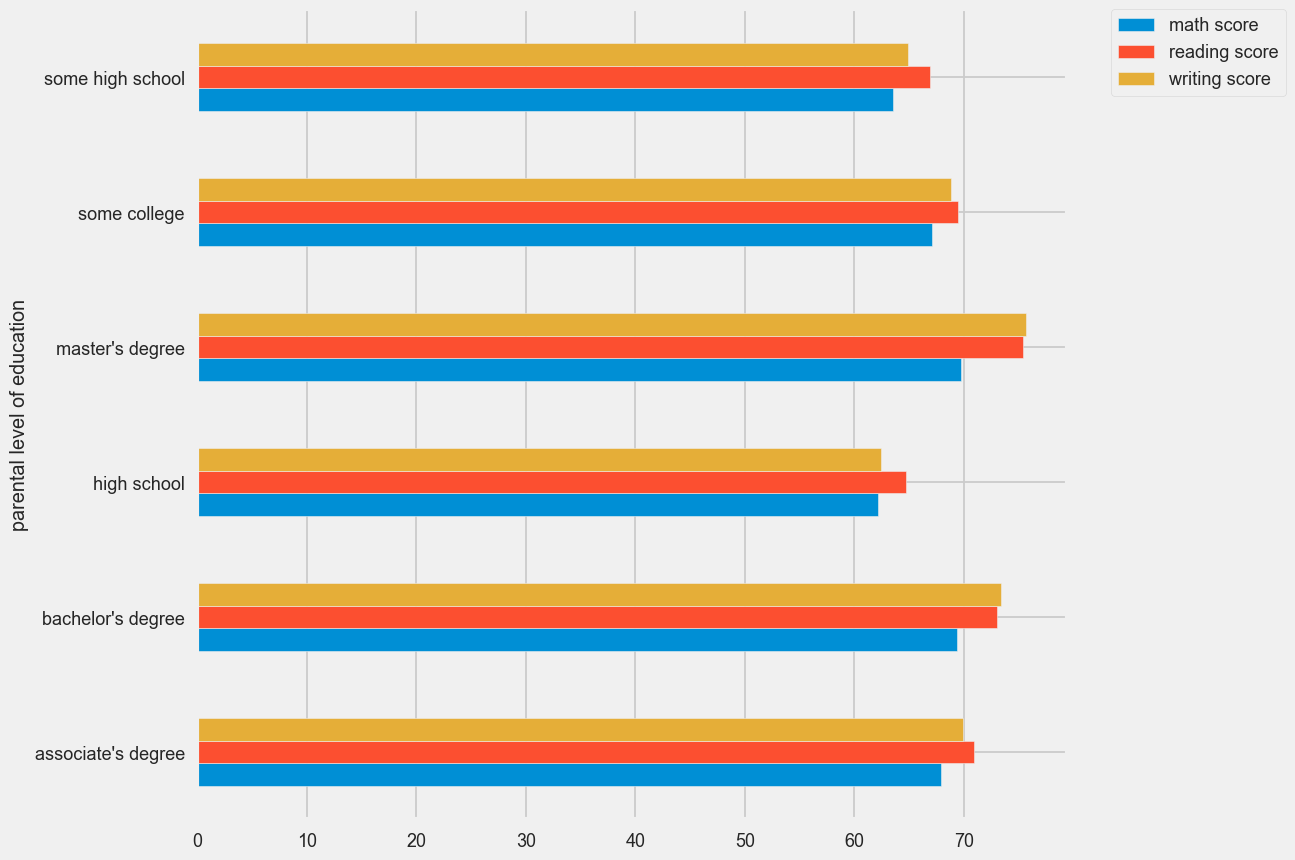

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include=['number']).columns

# Group by 'parental level of education' and calculate the mean for each numeric column
grouped_data = df.groupby('parental level of education')[numeric_cols].mean()

# Plot the grouped data as a horizontal bar plot
grouped_data.plot(kind='barh', figsize=(10, 10))

# Add a legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Show the plot
plt.show()


**Insights**
* Total score of student whose parents possess master and bachelor level education are higher than others.

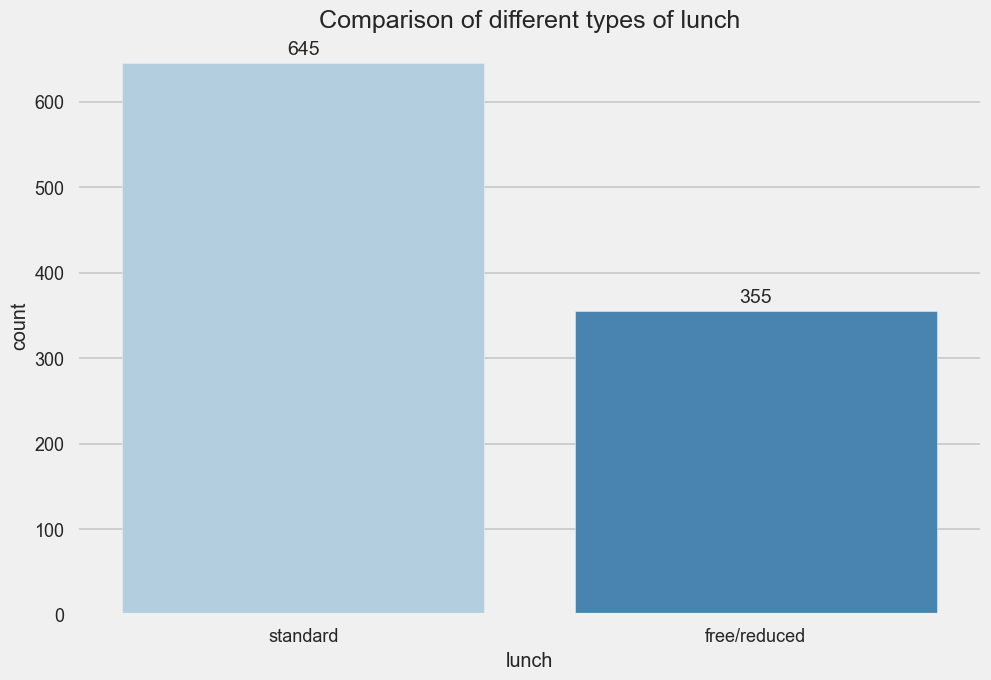

In [60]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
ax = sns.countplot(x='lunch', data=df, palette='Blues')
plt.title('Comparison of different types of lunch', fontsize=18)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
plt.show()

<p style="color:purple;font-size:25px;">4.8 Multivariate Analysis Using Pairplot</p>

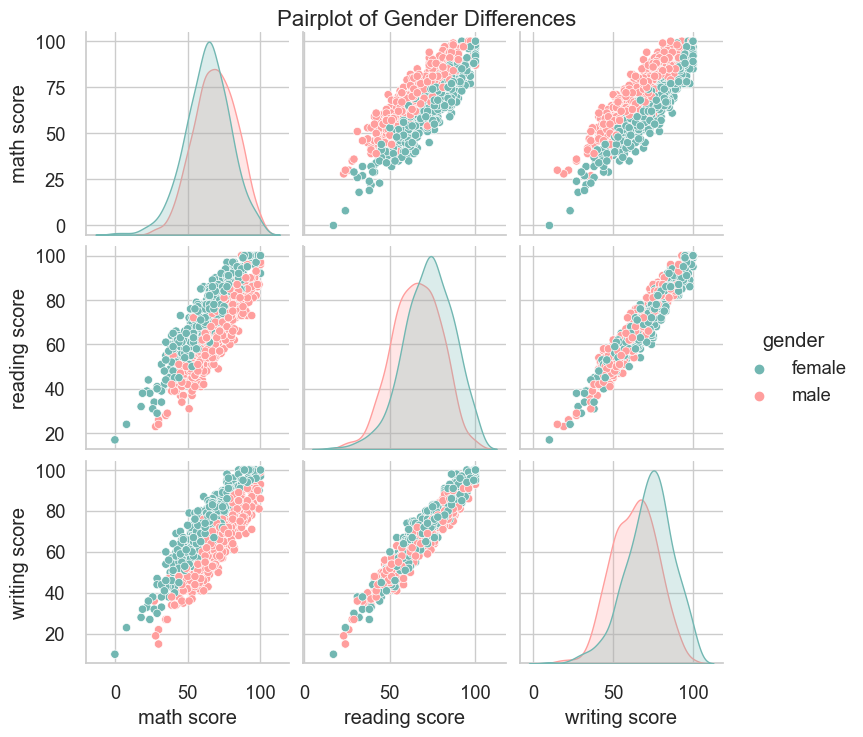

In [61]:
# Use a modern color palette
colors = ["#72b7b2", "#ff9e9d"]

# Set style and context
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2)

# Create pairplot with hue and custom color palette
sns.pairplot(df, hue="gender", palette=colors)

# Add some visual enhancements
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairplot of Gender Differences", fontsize=16)

# Show the plot
plt.show()


**Insights**
* From the above plot it is clear that all the scores increase linearly with each other.

<p style="color:purple;font-size:25px;">4.9 Checking Outliers</p>

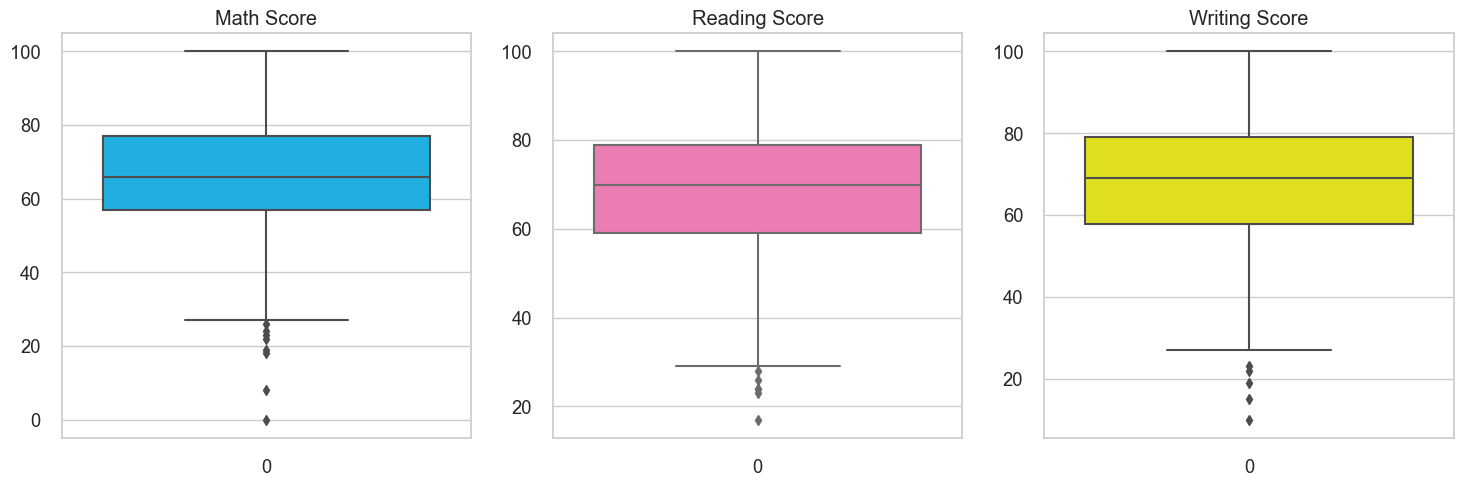

In [63]:
# Define modern color palettes
skyblue = "#00BFFF"
hotpink = "#FF69B4"
yellow = "#FFFF00"
lightgreen = "#90EE90"

# Create subplots with specified figure size
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

# Plot boxplots for each score column and set color using the defined palettes
sns.boxplot(df['math score'], color=skyblue, ax=axs[0])
sns.boxplot(df['reading score'], color=hotpink, ax=axs[1])
sns.boxplot(df['writing score'], color=yellow, ax=axs[2])

# Set titles for each subplot
axs[0].set_title('Math Score')
axs[1].set_title('Reading Score')
axs[2].set_title('Writing Score')

# Show the plot
plt.show()

<p style="color:purple;font-size:25px;">5. Model Training</p>

<p style="color:purple;font-size:25px;">5.1 Show Top 10 Records</p>

In [64]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<p style="color:purple;font-size:25px;">5.2 Preparing X and Y variables</p>

In [68]:
# Dropping the specified columns (ensure the column names are correct)
X = df.drop(columns=['writing score', 'reading score', 'math score'], axis=1)

# Display the shape and the first few rows of the updated DataFrame
print("Data Shape is :", X.shape)
X.head()


Data Shape is : (1000, 5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [69]:
Y = df['math score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

<p style="color:purple;font-size:25px;">5.3 Create Column Transformer with 3 types of transformers</p>

In [70]:
# Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [71]:
X = preprocessor.fit_transform(X)

In [72]:
X.shape

(1000, 17)

<p style="color:purple;font-size:25px;">5.4 Separate dataset into train and test</p>

In [73]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 17), (200, 17))

<p style="color:purple;font-size:25px;">5.5 Create an Evaluate Function to give all metrics after model Training</p>

In [74]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>5.6 Models Training</strong>
</p>


In [75]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

# Train model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) 

    # Make predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(Y_train, Y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(Y_test, Y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 12.8585
- Mean Absolute Error: 10.4697
- R2 Score: 0.2666
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.1602
- Mean Absolute Error: 11.2699
- R2 Score: 0.1760


Lasso
Model performance for Training set
- Root Mean Squared Error: 13.8688
- Mean Absolute Error: 11.1349
- R2 Score: 0.1468
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.9207
- Mean Absolute Error: 11.7251
- R2 Score: 0.0851


Ridge
Model performance for Training set
- Root Mean Squared Error: 12.8586
- Mean Absolute Error: 10.4691
- R2 Score: 0.2666
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.1605
- Mean Absolute Error: 11.2712
- R2 Score: 0.1760


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 12.4115
- Mean Absolute Error: 10.0115
- R2 Score: 0.3167
---------

<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>5.7 Results</strong>
</p>


In [76]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.176000
2,Ridge,0.175968
8,AdaBoost Regressor,0.131637
1,Lasso,0.085118
3,K-Neighbors Regressor,-0.003951
7,CatBoosting Regressor,-0.019643
5,Random Forest Regressor,-0.029208
6,XGBRegressor,-0.052966
4,Decision Tree,-0.061695


<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>5.8 Linear Regression</strong>
</p>


In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Ensure all necessary columns are present
if 'math score' in df.columns:
    # Drop non-numeric columns or handle them appropriately
    X = df.drop(columns=['math score'])
    
    # Check for non-numeric columns and convert them if necessary
    non_numeric_cols = X.select_dtypes(exclude=['number']).columns
    if len(non_numeric_cols) > 0:
        X = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)
    
    Y = df['math score']

    # Handle missing values if any
    X.fillna(0, inplace=True)
    Y.fillna(0, inplace=True)

    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize the Linear Regression model
    lin_model = LinearRegression(fit_intercept=True)

    # Fit the model on the training data
    lin_model = lin_model.fit(X_train, Y_train)

    # Predict on the test data
    Y_pred = lin_model.predict(X_test)

    # Calculate the R-squared score
    score = r2_score(Y_test, Y_pred) * 100

    # Display the score
    print(f"R-squared score: {score}%")
else:
    print("The 'math score' column is not present in the dataset.")


R-squared score: 88.04332983749565%


<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>5.9 Plot Y_pred and Y_test</strong>
</p>


#### Scatter Plot of Actual vs. Predicted

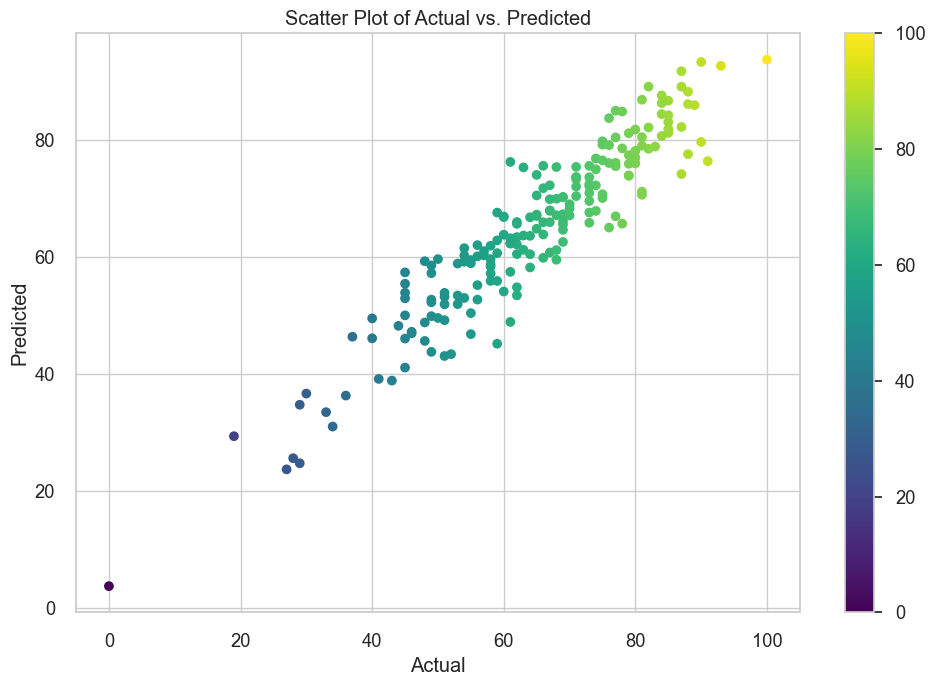

In [80]:
from matplotlib import cm
# Create the scatter plot
fig, ax = plt.subplots()
sc = ax.scatter(Y_test, Y_pred, c=Y_test, cmap=cm.viridis)
fig.colorbar(sc)

# Set the axis labels
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Scatter Plot of Actual vs. Predicted')

plt.show()

#### Regression Plot of Actual vs. Predicted

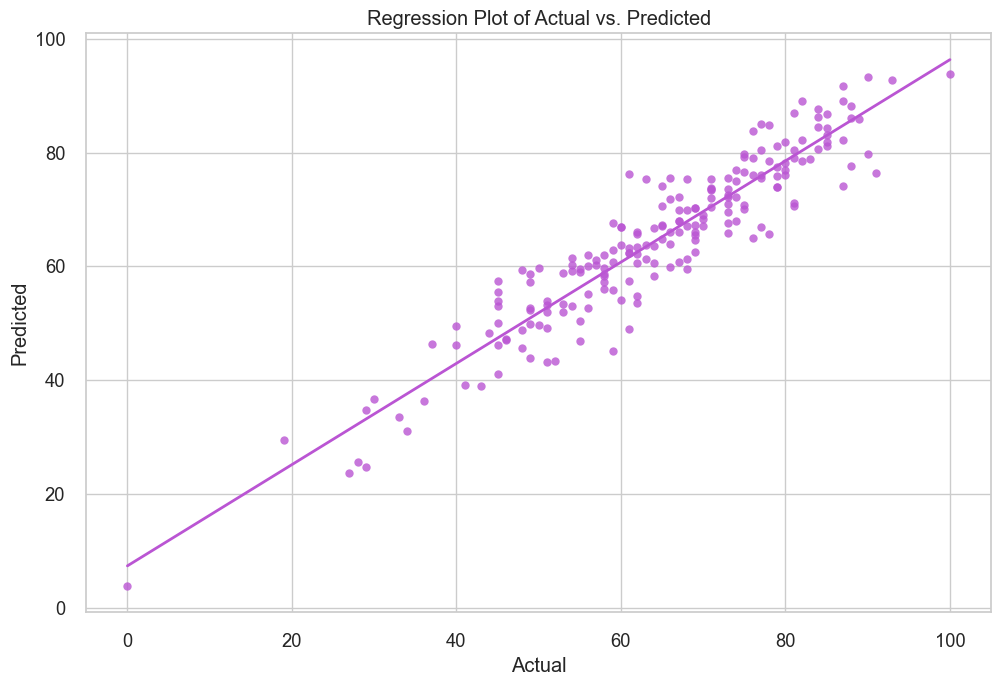

In [81]:
# Create the regression plot
sns.set_style('whitegrid')
sns.regplot(x=Y_test, y=Y_pred, ci=None, color='mediumorchid', line_kws={'lw':2})

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Regression Plot of Actual vs. Predicted')

plt.show()

<p style="color:Purple; font-family: 'Times New Roman'; font-size: 25px;">
  <strong>5.10 Difference between Actual and Predicted Values</strong>
</p>


In [82]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred,'Difference':Y_test-Y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
